              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



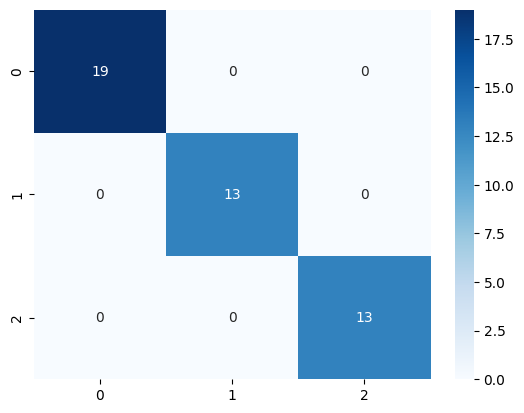

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()
# Accuracy
# k = 1, 2, 4 => 0.98
# k = 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 => 1

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



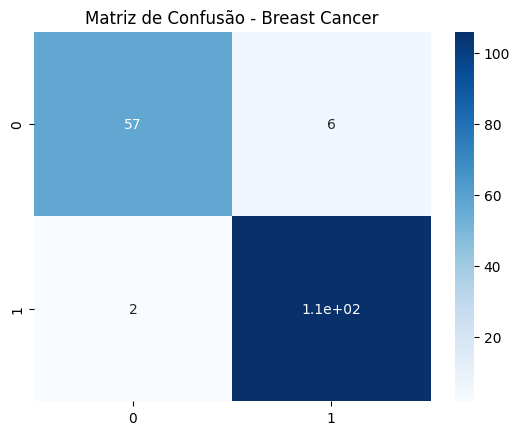

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a base Breast Cancer
data = load_breast_cancer()
X, y = data.data, data.target

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo KNN com k=15 (você pode testar outros valores)
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

# Prever os dados de teste
y_pred = knn.predict(X_test)

# Mostrar relatório de classificação
print(classification_report(y_test, y_pred))

# Mostrar matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Matriz de Confusão - Breast Cancer')
plt.show()


## Compare o KNN com outros algoritmos supervisionados
# Achei a acurácia muito maior comparado a outros algoritmos

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Carregar dados
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Padronizar (importante para KNN e Regressão Logística)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Definir modelos
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42)
}

# 5. Treinar, prever e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}: Acurácia = {acc:.2f}')

#Regressão Logística apresentou o melhor resultado, com acurácia de
#98%, indicando que esse modelo conseguiu classificar corretamente a maioria dos casos.

#KNN teve um desempenho muito bom também, com 96% de acurácia, mostrando que a
#abordagem baseada em vizinhos próximos é eficiente para esse problema.

#Árvore de Decisão obteve 94%, sendo o modelo com menor acurácia entre os três,
#mas ainda assim com desempenho aceitável.


KNN: Acurácia = 0.96
Árvore de Decisão: Acurácia = 0.94
Regressão Logística: Acurácia = 0.98
